# 1. Generate Benchmark Model

In [84]:
# Read data
import pandas as pd
import numpy as np
df = pd.read_csv('riders.csv')

In [85]:
# Clean up the data
column_list=df.columns.to_list()
df[column_list] = df[column_list].replace({'\$': '', ',': ''}, regex=True)
df[column_list] = df[column_list].astype(int)
df.head()

,City,Number of weekly riders,Price per week,Population of city,Monthly income of riders,Average parking rates per month
0,1,192000,15,1800000,5800,50
1,2,190400,15,1790000,6200,50
2,3,191200,15,1780000,6400,60
3,4,177600,25,1778000,6500,60
4,5,176800,25,1750000,6550,60


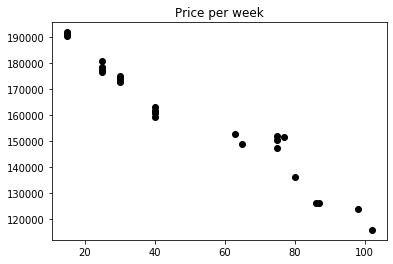

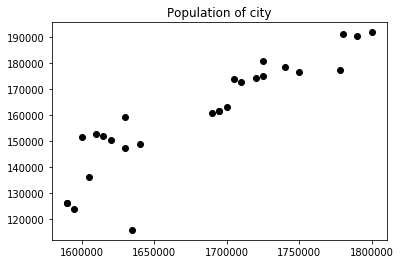

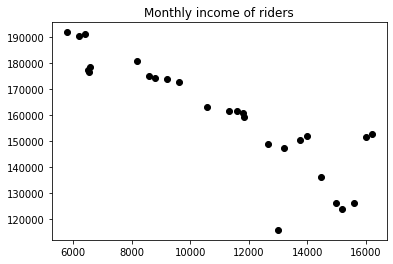

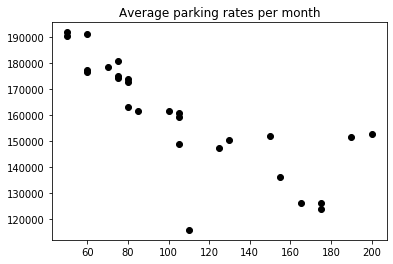

In [72]:
# Scatter plot of every independent variable VS dependent variable
import matplotlib.pyplot as plt
iv_variable=[i for i in column_list if i not in ['City ', 'Number of weekly riders']]
for i in iv_variable:
    plt.scatter(list(df[i]), list(df['Number of weekly riders']), color='black')
    plt.title(i)
    plt.show()

In [73]:
# Create a benchmark model: Quick Linear Regression
import statsmodels.api as sm
X=df[iv_variable]
Y=df['Number of weekly riders']
X = sm.add_constant(X) # adding a constant

model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
print_model = model.summary()
print(print_model)

C:\Users\xue.ju\AppData\Local\Continuum\anaconda\lib\site-packages\statsmodels\compat\pandas.py:49: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


                               OLS Regression Results                              
Dep. Variable:     Number of weekly riders   R-squared:                       0.945
Model:                                 OLS   Adj. R-squared:                  0.936
Method:                      Least Squares   F-statistic:                     95.40
Date:                     Mon, 22 Feb 2021   Prob (F-statistic):           1.44e-13
Time:                             20:41:43   Log-Likelihood:                -267.62
No. Observations:                       27   AIC:                             545.2
Df Residuals:                           22   BIC:                             551.7
Df Model:                                4                                         
Covariance Type:                 nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------

In [101]:
# The result shows strong multicollinearity, have a look of correlation matrix
corr=df.corr()
corr.style.background_gradient(cmap='coolwarm')

,City,Number of weekly riders,Price per week,Population of city,Monthly income of riders,Average parking rates per month
City,1.000000,-0.869455,0.897478,-0.977315,0.994476,0.966017
Number of weekly riders,-0.869455,1.000000,-0.965953,0.897565,-0.872665,-0.793423
Price per week,0.897478,-0.965953,1.000000,-0.914897,0.896675,0.848981
Population of city,-0.977315,0.897565,-0.914897,1.000000,-0.971268,-0.919019
Monthly income of riders,0.994476,-0.872665,0.896675,-0.971268,1.000000,0.948526
Average parking rates per month,0.966017,-0.793423,0.848981,-0.919019,0.948526,1.000000


In [76]:
# calculate VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [77]:
calc_vif(X)

,variables,VIF
0,const,17064.963116
1,Price per week,6.179894
2,Population of city,21.399681
3,Monthly income of riders,27.502520
4,Average parking rates per month,9.979181


# 2. Handle Multicollinearity

### 2.1 Drop multicollinearity variables

In [88]:
# Drop multicollinearity variables
X_new=X.drop(['Population of city', 'Monthly income of riders'], axis=1)

In [90]:
# Check VIF again
calc_vif(X_new)

,variables,VIF
0,const,6.930177
1,Price per week,3.581251
2,Average parking rates per month,3.581251


In [91]:
# Run linear regression again
model = sm.OLS(Y, X_new).fit()
print_model = model.summary()
print(print_model)

                               OLS Regression Results                              
Dep. Variable:     Number of weekly riders   R-squared:                       0.936
Model:                                 OLS   Adj. R-squared:                  0.930
Method:                      Least Squares   F-statistic:                     174.4
Date:                     Tue, 23 Feb 2021   Prob (F-statistic):           5.08e-15
Time:                             10:09:58   Log-Likelihood:                -269.87
No. Observations:                       27   AIC:                             545.7
Df Residuals:                           24   BIC:                             549.6
Df Model:                                2                                         
Covariance Type:                 nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------

In [92]:
# Drop the unsignificant variable
X_new2=X_new.drop(['Average parking rates per month'], axis=1)

In [93]:
model = sm.OLS(Y, X_new2).fit()
print_model = model.summary()
print(print_model)

                               OLS Regression Results                              
Dep. Variable:     Number of weekly riders   R-squared:                       0.933
Model:                                 OLS   Adj. R-squared:                  0.930
Method:                      Least Squares   F-statistic:                     348.5
Date:                     Tue, 23 Feb 2021   Prob (F-statistic):           3.41e-16
Time:                             10:14:25   Log-Likelihood:                -270.39
No. Observations:                       27   AIC:                             544.8
Df Residuals:                           25   BIC:                             547.4
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

In [94]:
# R-Square=93.3%, which did not reduce too much compared with include all independent variables
# Next step let's further investigate the model performance 

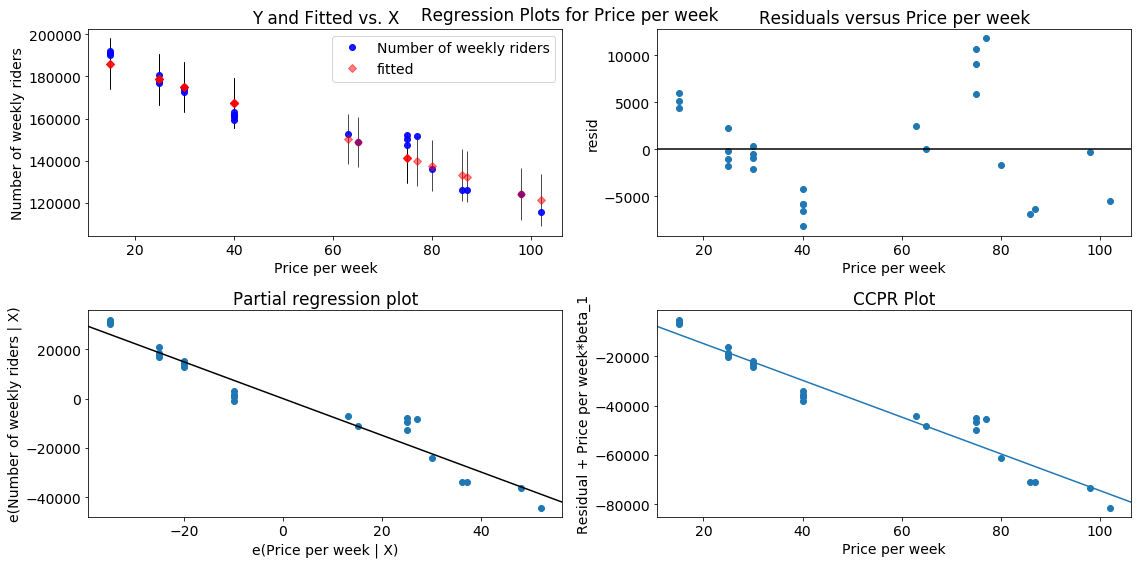

In [100]:
plt.rc("figure", figsize=(16,8))
plt.rc("font", size=14)
fig = sm.graphics.plot_regress_exog(model, "Price per week")
fig.tight_layout(pad=1.0)

##### Therefore, we could build the linear model with only one independent variables (Price per week) and drop others

### 2.2 Transform the data with PCA

In [176]:
X=df[iv_variable]
y=df['Number of weekly riders']
# Normalize the X data because the scales of independent variables are very different. And PCA would be affected by scale
from sklearn import preprocessing
standard_scaler=preprocessing.StandardScaler()
X_scaled = standard_scaler.fit_transform(X)
X_rescale=pd.DataFrame(X_scaled)
# Create the new data frame by transforming data using PCA
from sklearn.decomposition import PCA
pca=PCA(n_components=4)
components=pca.fit_transform(X_rescale)
componentsDf=pd.DataFrame(data=components, columns=['component'+str(i) for i in range(1,5)])

C:\Users\xue.ju\AppData\Local\Continuum\anaconda\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\xue.ju\AppData\Local\Continuum\anaconda\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int32 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [177]:
# Have a look of PCA variables
componentsDf.head()

,component1,component2,component3,component4
0,2.976864,0.021950,-0.376750,-0.097342
1,2.839865,-0.000293,-0.244247,-0.098709
2,2.621865,-0.139238,-0.267788,-0.002451
3,2.411562,0.145419,-0.376764,-0.029077
4,2.190413,0.152246,-0.111028,0.211233


In [178]:
# Check VIF for PCA transformed components
calc_vif(componentsDf)

,variables,VIF
0,component1,1.0
1,component2,1.0
2,component3,1.0
3,component4,1.0


In [179]:
# Normalize y
y_scaled = standard_scaler.fit_transform(pd.DataFrame(y))
y_rescale=pd.DataFrame(y_scaled)
# Fit the components and normalized y into linear regression model
model = sm.OLS(y_rescale, componentsDf).fit()
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                      0   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     99.74
Date:                Tue, 23 Feb 2021   Prob (F-statistic):           3.50e-14
Time:                        13:31:37   Log-Likelihood:                0.96577
No. Observations:                  27   AIC:                             6.068
Df Residuals:                      23   BIC:                             11.25
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
component1     0.4703      0.025     18.709      0.0

C:\Users\xue.ju\AppData\Local\Continuum\anaconda\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\xue.ju\AppData\Local\Continuum\anaconda\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int32 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [173]:
# Drop the unsignificant components
componentsDf_new=componentsDf.drop(['component3', 'component4'], axis=1)

In [174]:
model = sm.OLS(y_rescale, componentsDf_new).fit()
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                      0   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     213.2
Date:                Tue, 23 Feb 2021   Prob (F-statistic):           1.96e-16
Time:                        12:48:21   Log-Likelihood:                0.74948
No. Observations:                  27   AIC:                             2.501
Df Residuals:                      25   BIC:                             5.093
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
component1     0.4703      0.024     19.350      0.0

##### Therefore, we could use PCA to eliminate colinearity and build model with components

# 3. Summary

##### 1. Drop variables and PCV could be used to handle multicollinearity
##### 2. But PCA would bring extra complication into the model and make it harder to interpret
##### 3. In this case, drop variables would be a better choice